<h1 style="text-align:center;">Projet : MC Trackers</h1>

In [1]:
import random as rand
import math as m
import scipy.integrate as sintgr
import numpy as np
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import RegularGridInterpolator
from scipy.interpolate import interp1d
from scipy.interpolate import splprep, splev

<h1 style="text-align:center;">Definition of global variables</h1>

In [2]:
B = 0.5 #value of the magnetic field whose direction is defined as positive along z
c = 299792458 #m/s.
mp = 1.6726e-27 #mass of the proton 
mn = 1.6749e27 #mass of the neutron
me = 9.1094e-31 #mass of the electron

e = 1.602e-19

dimension_pixel_x=0.01e-4  #pixel size according to x in m
dimension_pixel_y=0.01e-4  #pixel size according to y in m

#we want to have 100 pixels along x and 100 pixels along y

dim = []  #The size of the sensor can vary with an angle introduced
dim.append(5.00e-2)  #according to x in m
dim.append(5.00e-2)  #according to y in m

dis = [0.50e-2 for i in range(8)] #distance between two plates in m (there are 4 plates)

D_max = dis[0] + dis[1] +dis[2]  #distance on which there are our 4 detectors (our pieces of straight lines)
  
Lo = 1e-2 #length of our coil in m

<h1 style="text-align:center;">Class definition</h1>

In [3]:
#DEF DETECTOR CLASS

class detecteur():
    def __init__(self):  #creator
        self.px = 0 #variable that stores the pixel according to x that is activated by the particle
        self.py = 0 #variable that stores the pixel according to y that is activated by the particle
        
    def check(self):  #function that checks the activated pixels in our detector
        print("la particule a activé selon x le pixel numéro :",self.px)
        print("la particule a activé selon y le pixel numéro :",self.py) 

In [4]:
#DEF COORDINATES CLASS

class coor():
    def __init__(self):  #creator
        self.x=0  #list that stores the x-position of the particle
        self.y=0  #list that stores the y-position of the particle
        self.z=0  #list that stores the z-position of the particle
        
    def check(self):  #function that checks the parameters of our coordinates
        print(self.x)
        print(self.y)
        print(self.z)

In [5]:
#DEF PARTICULE CLASS

class part():
    def __init__(self):  #creator
        self.x = rand.uniform(-dim[0],dim[0]) #initial position at the source in x 
        self.y = rand.uniform(-dim[1],dim[1]) #initial position at the source in y
        self.z = 0 #initial position at the source in z
        self.phi = 0 #phi angle of the particle 
        self.theta = 0 #theta angle of the particle 
        self.trace = [coor() for i in range(8)] #list that contains the positions of the particle for a number of detectors
        self.E = np.random.normal(2e6,10) #the energy of the particle ditribution normal centered in 2 MeV
        self.qe = -1 #rand.randint(-1,1)
        self.q = False  #if the particle is out in our system  
        self.n = 0  # to which plan the share goes out if it goes out
        
    def check(self):  #function that checks the parameters of our particle
        print("x=",self.x)
        print("y=",self.y)
        print("z=",self.z)
        print("phi=",self.phi)
        print("theta=",self.theta)
        print("q=",self.q)
        print("e=",self.e)
        for i in range(len(self.trace)):
            print("pour le detecteur n° en x",i ,self.trace[i].x)
            print("pour le detecteur n° en y",i ,self.trace[i].y)
            print("pour le detecteur n° en z",i ,self.trace[i].z)
    
    def restart(self):
        self.E = np.random.normal(2e6,200)
    
    def simul(self):

        self.trace[0].x = rand.uniform(-dim[0],dim[0]) #distribution of x and y in the dimensions of the detector
        self.trace[0].y = rand.uniform(-dim[1],dim[1]) #distribution of x and y in the dimensions of the detector
        self.phi = rand.uniform(0,2*m.pi)  #phi distribution between 0 and 2 pi
        self.theta = distr_theta()   #theta distribution with cos power 1.85
        self.q=False
        self.n=0
        return

    def trajec(self):
        
        v = 0 #constant float that calculates the next position on the detector according to x
        w = 0 #constant float that calculates the next position on the detector according to y
        
        if self.z>=0 or self.z<D_max :
        
            v = dis[0]*m.cos(self.phi)*m.sin(self.theta)+self.trace[0].x
            w = dis[0]*m.sin(self.phi)*m.sin(self.theta)+self.trace[0].y
            
            self.trace[1].x = v
            self.trace[1].y = w
        
            v = dis[1]*m.cos(self.phi)*m.sin(self.theta)+self.trace[1].x
            w = dis[1]*m.sin(self.phi)*m.sin(self.theta)+self.trace[1].y
            
            self.trace[2].x = v
            self.trace[2].y = w
        
            v = dis[2]*m.cos(self.phi)*m.sin(self.theta)+self.trace[2].x
            w = dis[2]*m.sin(self.phi)*m.sin(self.theta)+self.trace[2].y
            
            self.trace[3].x = v
            self.trace[3].y = w
        
            v = dis[3]*m.cos(self.phi)*m.sin(self.theta)+self.trace[3].x
            w = dis[3]*m.sin(self.phi)*m.sin(self.theta)+self.trace[3].y
         
        if self.z>=D_max+Lo :
        
            self.trace[4].x = v
            self.trace[4].y = w
        
            v = dis[4]*m.cos(self.phi)*m.sin(self.theta)+self.trace[4].x
            w = dis[4]*m.sin(self.phi)*m.sin(self.theta)+self.trace[4].y
            
            self.trace[5].x = v
            self.trace[5].y = w
        
            v = dis[5]*m.cos(self.phi)*m.sin(self.theta)+self.trace[5].x
            w = dis[5]*m.sin(self.phi)*m.sin(self.theta)+self.trace[5].y

            self.trace[6].x = v
            self.trace[6].y = w
                             
            v = dis[6]*m.cos(self.phi)*m.sin(self.theta)+self.trace[6].x
            w = dis[6]*m.sin(self.phi)*m.sin(self.theta)+self.trace[6].y

            self.trace[7].x = v
            self.trace[7].y = w
        
            self.n = 0
            self.q = False
        
        for i in range(8): #test if the particle leaves the system
            if(abs(self.trace[i].x)>dim[0] or abs(self.trace[i].y)>dim[1]):
                self.n=i
                self.q = True
                
                break
         
    
    def test_1(self): #is the particle out?
        if self.q==True:
            print("la particule sort du système a partir du ",self.n ,"eme plan de détection")
        else :
            print("la particule reste dans le systeme de detection")
        return

<h1 style="text-align:center;">Definition of useful functions</h1>

In [6]:
#FUNCTIONS

def distr_theta(): #monte carlo for theta distribution 
    theta=m.pi/2
    y=1
    while y>m.pow(np.cos(theta),1.85) :
        theta = rand.uniform(-m.pi/2,m.pi/2)  #pitch on the bounds here 0 a pi/2
        y = rand.uniform(0,1)
    return theta
    
    
def monte_carlo(): #allows to see the monte carlo for distribution of theta 
    n=10000
    theta=0
    f=open("data_monte_carlo.txt","w");
    for i in range(n+1):
        theta=distr_theta()
        f.write(str(theta)+'\n')
    f.close()
    return

def plot_spline_trajectory(x, y, z):
    # Interpolate each coordinate with a spline
    t = np.arange(len(x))
    t_new = np.linspace(0, len(x)-1, 100*len(x))
    f_x = interp1d(t, x, kind='cubic')
    f_y = interp1d(t, y, kind='cubic')
    f_z = interp1d(t, z, kind='cubic')
    
    # Evaluate the spline at regularly spaced points
    x_new = f_x(t_new)
    y_new = f_y(t_new)
    z_new = f_z(t_new)

    return x_new, y_new, z_new


muon = part()
muon.simul()

<h1 style="text-align:center;">Main code</h1>

In [18]:
sigma_x = dimension_pixel_x/(12**0.5)  #uncertainty for x
sigma_y = dimension_pixel_y/(12**0.5)  #uncertainty for y

theta2 = 0 #angle of the detector to the zenith
str1 = 'n'
print("Does the detector have an angle? (y/n)")
str1 = input() 
while str=="y":
    print("what angle does the detector have in radian?")  #angle sensor to the ground
    theta2 = float(input())
    dim[0] = dim[0]*cos(theta2)

    #particle counter
n = 0
p = 0.

    #hit counter
k_0 = 0 
k_1 = 0
k_2 = 0
k_3 = 0

k_4 = 0
k_5 = 0
k_6 = 0
k_7 = 0

alpha = 0

while n<=0 :
    print("How many iterations for the simulation?")
    n = int(input())

f = open("data_trace.out", "w") #output file for the space track
f1 = open("data_theta_0.out", "w") #output file for histogram on theta
f2 = open("data_detecteur.out", "w") #output file for activated pixels
f3 = open("data_p.txt", "w") #fOutput file for pulse and particle uncertainty
f4 = open("data_ptheo.txt", "w")

stat = part()
detecteur0 = detecteur()
detecteur1 = detecteur()
detecteur2 = detecteur()
detecteur3 = detecteur()
detecteur4 = detecteur()
detecteur5 = detecteur()
detecteur6 = detecteur()
detecteur7 = detecteur()
        
for i in range(n):

        stat.simul()
        stat.restart()
        stat.z=0
        stat.trajec()
            
        #we add the dimension so that in -dimension it has the first pixel according to x and y to change the center of the detector 
        detecteur0.px = (m.floor((stat.trace[0].x+dim[0])/dimension_pixel_x)+1) #the activated pixel according to x
        detecteur0.py = (m.floor((stat.trace[0].y+dim[1])/dimension_pixel_y)+1) #the activated pixel according to y
        detecteur1.py = (m.floor((stat.trace[1].x+dim[0])/dimension_pixel_x)+1) #the activated pixel according to x
        detecteur1.px = (m.floor((stat.trace[1].y+dim[1])/dimension_pixel_y)+1) #the activated pixel according to y
        detecteur2.px = (m.floor((stat.trace[2].x+dim[0])/dimension_pixel_x)+1) #the activated pixel according to x
        detecteur2.py = (m.floor((stat.trace[2].y+dim[1])/dimension_pixel_y)+1) #the activated pixel according to y
        detecteur3.px = (m.floor((stat.trace[3].x+dim[0])/dimension_pixel_x)+1) #the activated pixel according to x
        detecteur3.py = (m.floor((stat.trace[3].y+dim[1])/dimension_pixel_y)+1) #the activated pixel according to y

        #stat.test_1()

        stat.z+=D_max  #we arrive at the deviation zone
        
        theta_init = stat.theta
        p=((2*me*stat.E)/(c**2))**0.5
        p=p/(5.3444*1e-19)
        alpha = m.asin((stat.qe*0.3*B*Lo)/p)
        stat.theta+=alpha
#######        
        stat.z+=Lo #we leave the deviation zone
        stat.trajec()
        
        d_xy = (dimension_pixel_x*(detecteur3.px-detecteur0.px))**2+(dimension_pixel_y*(detecteur3.py-detecteur0.py))**2
        
        theta_exp = m.atan(d_xy**0.5/D_max)
        
        d_xy = (dimension_pixel_x*(detecteur7.px-detecteur4.px))**2+(dimension_pixel_y*(detecteur7.py-detecteur4.py))**2
        
        alpha_exp = m.atan(d_xy**0.5/D_max)
        
        alpha_exp = alpha_exp-theta_exp
        
        #print("angle exp", alpha_exp, theta_exp,alpha)------------------------------------------------------------
        
        if m.sin(alpha_exp)==0:
            p_exp=0
        else :
            p_exp = (stat.qe*0.3*B*Lo)/m.sin(alpha_exp)
        
        #calculation of uncertainties for theta exp and alpha exp------------------------------------------------------------
            
        x=(detecteur3.px-detecteur0.px)*dimension_pixel_x
        y=(detecteur3.py-detecteur0.py)*dimension_pixel_y
        sigma_theta=0
        df_x = 0
        df_y = 0
        
        
        if (x*x+y*y)==0:
            df_x = 0
            df_y = 0
        else :   
            df_x = 1/(((x*x+y*y)**0.5)*(x*x+y*y+D_max*D_max))
            df_y = 1/(((x*x+y*y)**0.5)*(x*x+y*y+D_max*D_max))
            
        sigma_theta = (df_x*df_x*sigma_x*sigma_x+df_y*df_y*sigma_y*sigma_y)**0.5 #propagation uncertainty
        
        #calculation of uncertainties for alpha exp
            
        x=(detecteur7.px-detecteur4.px)*dimension_pixel_x
        y=(detecteur7.py-detecteur4.py)*dimension_pixel_y
        sigma_alpha=0
        df_x = 0
        df_y = 0
        
        
        if (x*x+y*y) == 0:
            df_x = 0
            df_y = 0
        else :   
            df_x = 1/(((x*x+y*y)**0.5)*(x*x+y*y+D_max*D_max))
            df_y = 1/(((x*x+y*y)**0.5)*(x*x+y*y+D_max*D_max))
            
        sigma_alpha = (df_x*df_x*sigma_x*sigma_x+df_y*df_y*sigma_y*sigma_y)**0.5 #propagation uncertainty
        
        #uncertainty on the angle of deviation (the difference between these two angles)
        
        sigma_alpha = ( (sigma_alpha)**2 + (sigma_theta)**2 )**0.5
        
        #finds an uncertainty on the impulse
        
        
        if m.sin(alpha_exp)==0:
            sigma_p=0
        else :
            sigma_p = ( ( (stat.qe*0.3*B*Lo)*(-1*m.cos(alpha_exp)/(m.sin(alpha_exp))**2)  )**2 * (sigma_alpha)**2 )**0.5
        
        f3.write(str(1)+" "+str(p_exp)+" "+str(sigma_p)+"\n")
        #print("alpha theo=", alpha, "alpha exp=", alpha_exp)
        #print("p=", p, "p_exp=", p_exp, "sigma p=", sigma_p )
        
        detecteur4.px = (m.floor((stat.trace[0].x+dim[0])/dimension_pixel_x)+1) #the activated pixel according to x
        detecteur4.py = (m.floor((stat.trace[0].y+dim[1])/dimension_pixel_y)+1) #the activated pixel according to y
        detecteur5.py = (m.floor((stat.trace[1].x+dim[0])/dimension_pixel_x)+1) #the activated pixel according to x
        detecteur5.px = (m.floor((stat.trace[1].y+dim[1])/dimension_pixel_y)+1) #the activated pixel according to y
        detecteur6.px = (m.floor((stat.trace[2].x+dim[0])/dimension_pixel_x)+1) #the activated pixel according to x
        detecteur6.py = (m.floor((stat.trace[2].y+dim[1])/dimension_pixel_y)+1) #the activated pixel according to y
        detecteur7.px = (m.floor((stat.trace[3].x+dim[0])/dimension_pixel_x)+1) #the activated pixel according to x
        detecteur7.py = (m.floor((stat.trace[3].y+dim[1])/dimension_pixel_y)+1) #the activated pixel according to y
            
        if stat.q==False :  #if the particle remains in the system 
        
            f2.write(" "+str(i))
            f2.write(str(" ")+str(detecteur0.px)+" "+str(detecteur0.py))
            f2.write(str(" ")+str(detecteur1.px)+" "+str(detecteur1.py))
            f2.write(str(" ")+str(detecteur2.px)+" "+str(detecteur2.py))
            f2.write(str(" ")+str(detecteur3.px)+" "+str(detecteur3.py))
            f2.write(str(" ")+str(detecteur4.px)+" "+str(detecteur4.py))
            f2.write(str(" ")+str(detecteur5.px)+" "+str(detecteur5.py))
            f2.write(str(" ")+str(detecteur6.px)+" "+str(detecteur6.py))
            f2.write(str(" ")+str(detecteur7.px)+" "+str(detecteur7.py)+"\n")

            f.write(" "+str(i))
            f.write(str(" ")+str(stat.trace[0].x)+" "+str(stat.trace[0].y))
            f.write(str(" ")+str(stat.trace[1].x)+" "+str(stat.trace[1].y))
            f.write(str(" ")+str(stat.trace[2].x)+" "+str(stat.trace[2].y))
            f.write(str(" ")+str(stat.trace[3].x)+" "+str(stat.trace[3].y))
            f.write(str(" ")+str(stat.trace[4].x)+" "+str(stat.trace[4].y))
            f.write(str(" ")+str(stat.trace[5].x)+" "+str(stat.trace[5].y))
            f.write(str(" ")+str(stat.trace[6].x)+" "+str(stat.trace[6].y))
            f.write(str(" ")+str(stat.trace[7].x)+" "+str(stat.trace[7].y))
            f.write(str(" ")+str(stat.q)+" "+str(stat.n)+"\n")  #Q give 0 in data_trace.out
            
            
        #test for count rate
        #n is the counter for the plan 0

        if stat.q and stat.n==0 : #plan 0
            k_0+=1 #counter plan 0

        if stat.q and stat.n==1 : #plan 1
            k_1+=1 #counter plan 1

        if stat.q and stat.n==2 : #plan 2
            k_2+=1 #counter plan 2

        if stat.q and stat.n==3 : #plan 3
            k_3+=1 #counter plan 3
            
        if stat.q and stat.n==4 : #plan 2
            k_4+=1 #counter plan 2

        if stat.q and stat.n==5 : #plan 3
            k_5+=1 #counter plan 3
            
        if stat.q and stat.n==6 : #plan 2
            k_6+=1 #counter plan 2

        if stat.q and stat.n==7 : #plan 3
            k_7+=1 #counter plan plan 3
            
print("nombre particule sur le 1 detecteur=", n)
print("nombre de hit sur le plan 0=", n-k_0)  #we remove the particles from the plan 0 
print("nombre de hit sur le plan 1=", n-(k_0+k_1))  #we remove the particles from the 0 and 1 plan 
print("nombre de hit sur le plan 2=", n-(k_0+k_1+k_2))  #we remove the particles from the 0 and 1 and 2 plan 
print("nombre de hit sur le plan 3=", n-(k_0+k_1+k_2+k_3))  #we remove the particles leaving the 0 and 1 and 2 and 3 plan
print("nombre de hit sur le plan 4=", n-(k_0+k_1+k_2+k_3+k_4))
print("nombre de hit sur le plan 5=", n-(k_0+k_1+k_2+k_3+k_4+k_5))
print("nombre de hit sur le plan 6=", n-(k_0+k_1+k_2+k_3+k_4+k_5+k_6))
print("nombre de hit sur le plan 7=", n-(k_0+k_1+k_2+k_3+k_4+k_5+k_6+k_7))

f.close()
f1.close()
f2.close()
f3.close()

Does the detector have an angle? (y/n)


 n


How many iterations for the simulation?


 50


nombre particule sur le 1 detecteur= 50
nombre de hit sur le plan 0= 50
nombre de hit sur le plan 1= 50
nombre de hit sur le plan 2= 49
nombre de hit sur le plan 3= 49
nombre de hit sur le plan 4= 48
nombre de hit sur le plan 5= 48
nombre de hit sur le plan 6= 47
nombre de hit sur le plan 7= 44


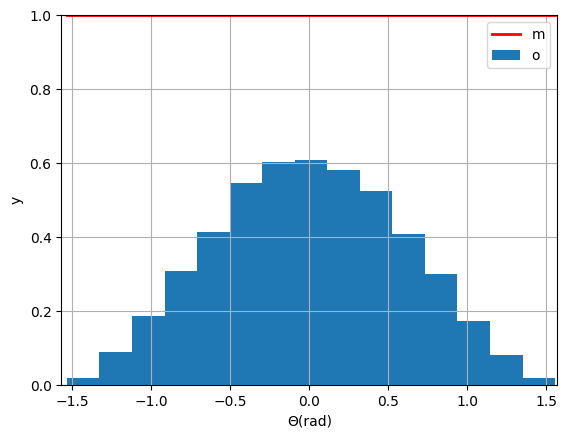

In [19]:
#MONTE CARLO
monte_carlo()

X=[]
Y=[]
f = open("data_monte_carlo.txt", "r")
for ligne in f.readlines():
    l = ligne.strip().split()
    X.append(float(l[0]))
   
f.close()

L=[np.cos(X[i])**1.85 for i in range(len(X))]

plt.figure()

count, bins, ignored = plt.hist(X, 15, density=True)
plt.plot(bins, np.ones_like(bins), linewidth=2, color='r')
plt.grid()
plt.xlim([-m.pi/2, m.pi/2])
plt.ylim([0, 1])
plt.xlabel("Θ(rad)")
plt.ylabel("y")
plt.legend("monte carlo")

plt.savefig("monte_carlo.png")
plt.show()

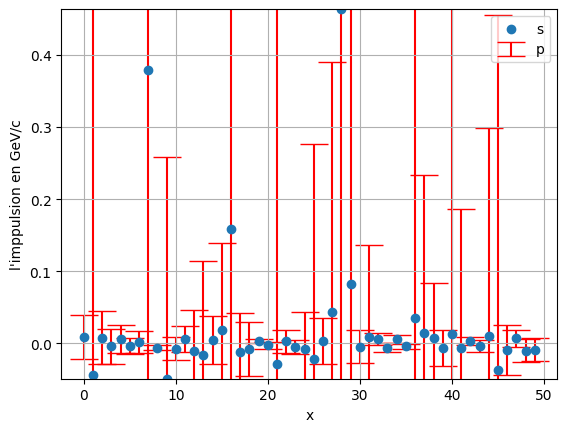

In [20]:
X1=[]
Y1=[]
j=0
f = open("data_p.txt", "r")
for ligne in f.readlines():
    l = ligne.strip().split()
    X1.append(float(l[1]))
    Y1.append(float(l[2]))
            
f.close()
a,b=min(X1), max(X1)
Z1=[i for i in range(len(X1))]
#print(X1)

plt.figure()
plt.scatter(Z1,X1, zorder = 2)
plt.errorbar(Z1, X1, xerr = None, yerr = Y1, fmt = 'none', capsize = 10, ecolor = 'red', zorder = 1)
plt.grid()
plt.ylim([a,b])
plt.xlabel("x")
plt.ylabel("l'imppulsion en GeV/c")
plt.legend("spectrométre")

plt.savefig("spectrometre.png")
plt.show()

In [21]:
# Define the trajectory data
xt = []
yt = []
zt = [ 0 , 0.5e-2 , 1e-2 , 1.5e-2 , 2.5e-2 , 3e-2 , 3.5e-2 , 4e-2]

valeur=23

f = open("data_trace.out","r")
for ligne in f.readlines():
    l = ligne.strip().split()  #takes the line and separates it into elements
    if int(l[0])==valeur:
        for i in range(1,len(l)-2):
            if i%2==0:
                xt.append(l[i])
            else :
                yt.append(l[i])
if xt==[]:
    print("there is no trace for this particle")
         
f.close()
                
def convert(x):
    for i in range(len(x)):
        x[i]=float(x[i])
        
def dilat(x):
    for i in range(len(x)):
        x[i]=x[i]*1e3 #mm scale

convert(xt)
convert(yt)
convert(zt)
dilat(xt)
dilat(yt)
dilat(zt)
print(xt)
print(yt)
print(zt)

[-16.53626579576343, -17.814627086793624, -19.09298837782382, -20.371349668854013, -21.64971095988421, -22.928072250914404, -24.206433541944598, -25.484794832974796]
[2.017302232160026, 1.2369660322095923, 0.45662983225915876, -0.32370636769127475, -1.1040425676417083, -1.884378767592142, -2.6647149675425754, -3.445051167493009]
[0.0, 5.0, 10.0, 15.0, 25.0, 30.0, 35.0, 40.0]


In [22]:
# Interpolate the trajectory
print(len(xt),len(yt),len(zt))
tck, u = splprep([xt, yt, zt], s=0)
u_new = np.linspace(u.min(), u.max(), 1000)
x_new, y_new, z_new = splev(u_new, tck)


8 8 8


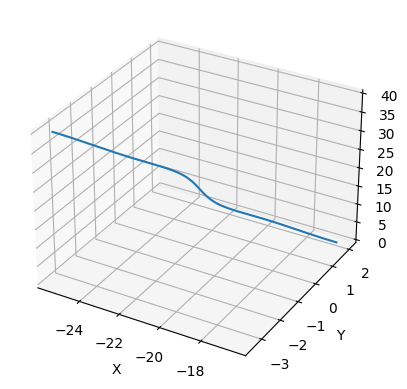

<Figure size 640x480 with 0 Axes>

In [23]:
# Initialization of the 3D figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Tracing of the trajectory
ax.plot(x_new, y_new, z_new)

# Adding axis labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Display of the figure
plt.show()
plt.savefig("trajec2.png")

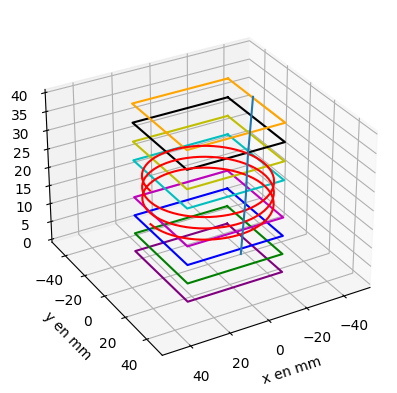

<Figure size 640x480 with 0 Axes>

In [24]:
# Define the centers and sizes of the squares
centers = np.array([[0,0], [0,0], [0,0], [0,0], [0,0], [0,0], [0,0], [0,0]])
sizes = np.array([[50,50], [50,50], [50,50], [50,50], [50,50], [50,50], [50,50], [50,50]])
z = zt

# Initialize the 3D figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Draw the squares
colors = ['purple', 'g', 'b', 'm', 'c', 'y', 'k', 'orange']
for center, size, color, z_val in zip(centers, sizes, colors, z):
    x_c = center[0] + np.array([-1, -1, 1, 1, -1]) * size[0]/2
    y_c = center[1] + np.array([-1, 1, 1, -1, -1]) * size[1]/2
    z_c = np.array([z_val, z_val, z_val, z_val, z_val])
    ax.plot(x_c, y_c, z_c, color=color)

# Spiral parameters
R = 30  # Radius
N = 200  # Number of points
L = 3  # Number of spirals
h = L / (2 * np.pi)  # No height

# Generate the points of the spiral
theta = np.linspace(0, 2*np.pi*L, N)
xr = R * np.cos(theta)
yr = R * np.sin(theta)
zr = 15 + h * theta

# Draw the spiral curve
ax.plot(xr, yr, zr, 'r')

# Drawing the trace 
ax.plot(xt, yt, zt)


# Add axis labels
ax.view_init(elev=30, azim=60)
ax.set_xlabel('x en mm')
ax.set_ylabel('y en mm')
ax.set_zlabel('z en mm')

#Lim 
ax.set_xlim([-52, 52])
ax.set_ylim([-52, 52])

plt.show()
plt.savefig("montage2.png")